# <strong><font color='red'>Aplicaciones Prácticas y Casos de Estudio</font></strong>

En esta sesión exploraremos cómo la inteligencia artificial está transformando la toma de decisiones en el mundo real. Analizaremos casos prácticos de distintos sectores —desde negocios y salud, hasta transporte y gobierno— para identificar qué datos se utilizan, qué modelos se aplican y cómo se interpretan los resultados.


**Librerías**
<br> Antes de comenzar a explorar nuestros datos, es importante importar las bibliotecas que nos permitirán manipularlos y visualizarlos.

In [64]:
# Importar librerías 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


sns.set_context("paper")  # Tamaño de fuente más profesional
sns.set_style("whitegrid")  # Fondo blanco con rejilla sutil

# Oculta TODOS los warnings
warnings.filterwarnings("ignore")

## **1. Inteligencia Artificial y su impacto en la toma de decisiones**

La Inteligencia Artificial (IA) es el conjunto de técnicas y sistemas capaces de realizar tareas que normalmente requieren inteligencia humana, como el razonamiento, el aprendizaje, la percepción y la toma de decisiones ([Russell & Norvig, 2021](https://aima.cs.berkeley.edu/)).
En la toma de decisiones, la IA actúa como un facilitador que analiza grandes volúmenes de datos, identifica patrones y propone o ejecuta acciones con rapidez y precisión.

<p align="center">
  <img src="Local\imgs\ia-app.png" alt="ia-app" width="800"  height="600"/>
</p>


| Área                           | Ejemplo                                                    | Beneficio principal                           |
| ------------------------------ | ---------------------------------------------------------- | --------------------------------------------- |
| **Predicción y pronóstico**    | Modelos de demanda en retail (Amazon anticipa inventario). | Reduce costos y mejora disponibilidad.        |
| **Optimización**               | Algoritmos de rutas para logística (DHL, UPS).             | Disminuye tiempos y costos operativos.        |
| **Personalización**            | Recomendadores (Netflix, Spotify).                         | Aumenta satisfacción y fidelización.          |
| **Detección temprana**         | IA en diagnóstico médico por imagen (Google Health).       | Mayor precisión y velocidad en diagnósticos.  |
| **Automatización de procesos** | Chatbots y asistentes virtuales.                           | Atención 24/7 y reducción de carga operativa. |


<p align="center">
  <img src="Local\imgs\beneficios-ia.png" alt="ia-beneficios" width="800"  height="600"/>
</p>

<p align="center">
  <img src="Local\imgs\riesgos-ia.png" alt="ia-contras" width="800"  height="600"/>
</p>


## **2. 🧠 Caso de Estudio: DeepMind Health y Moorfields Eye Hospital**      

[DeepMind Health](https://www.moorfields.nhs.uk/research/google-deepmind), en colaboración con el Moorfields Eye Hospital de Londres, desarrolló un sistema de **inteligencia artificial** capaz de detectar más de 50 patologías oculares (ej. degeneración macular, retinopatía diabética) a partir de imágenes de tomografía de coherencia óptica (OCT).  
El modelo logró una **precisión comparable a la de los mejores oftalmólogos**, ayudando a:
- Diagnosticar de forma **rápida y precisa**.
- Priorizar casos urgentes.
- Optimizar recursos hospitalarios.
- Dar soporte en zonas con escasez de especialistas.

> El sistema utiliza **deep learning** para analizar imágenes de retina y generar un informe de diagnóstico y recomendación de derivación.


### **Importar de librerías**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import urllib.request

### **Descarga del dataset desde Mendeley Data**

Datos OCT_dataset disponibles en [Mendeley Data](https://data.mendeley.com/datasets/rscbjbr9sj/3).

In [66]:
base_dir = "OCT_dataset_simulado"
categories = ["NORMAL", "ENFERMO"]

for cat in categories:
    os.makedirs(os.path.join(base_dir, cat), exist_ok=True)

# Generar imágenes sintéticas
def generar_imagen(clase):
    img = np.zeros((128, 128), dtype=np.uint8)
    if clase == "NORMAL":
        cv2.circle(img, (64, 64), 30, 180, -1)
    else:  # ENFERMO
        cv2.rectangle(img, (40, 40), (88, 88), 220, -1)
        cv2.line(img, (0, 0), (128, 128), 100, 2)
    return img

# Guardar imágenes
for cat in categories:
    for i in range(10):  # Solo 10 imágenes por clase
        img = generar_imagen(cat)
        path = os.path.join(base_dir, cat, f"{cat}_{i}.png")
        cv2.imwrite(path, img)

print("✅ Dataset simulado creado.")

✅ Dataset simulado creado.


### **Configuración visual**

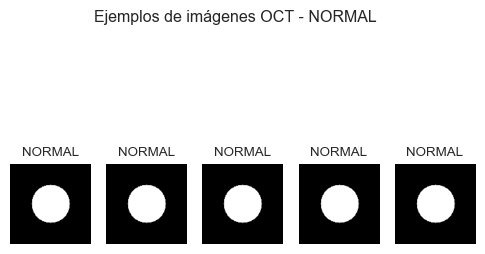

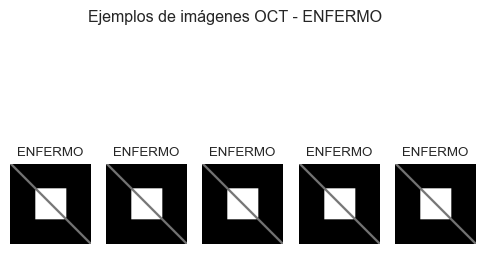

In [67]:
# Ajuste global del tamaño de figuras
plt.rcParams["figure.figsize"] = (6, 4)

# Directorio simulado con imágenes OCT
data_dir = "OCT_dataset_simulado"
categories = ["NORMAL", "ENFERMO"]

# Visualización de ejemplos por categoría
def mostrar_ejemplos(categoria):
    path = os.path.join(data_dir, categoria)
    images = os.listdir(path)[:5]
    fig, axs = plt.subplots(1, 5)  # Usa el tamaño por defecto definido arriba
    for i, img in enumerate(images):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axs[i].imshow(img_array, cmap="gray")
        axs[i].axis("off")
        axs[i].set_title(categoria)
    plt.suptitle(f"Ejemplos de imágenes OCT - {categoria}")
    plt.show()

# Mostrar ejemplos
mostrar_ejemplos("NORMAL")
mostrar_ejemplos("ENFERMO")


### **Preprocesamiento de imágenes**

In [68]:
IMG_SIZE = 128

def cargar_datos():
    datos = []
    for categoria in categories:
        path = os.path.join(data_dir, categoria)
        label = categories.index(categoria)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                datos.append([resized, label])
            except Exception as e:
                pass
    return datos

datos = cargar_datos()
print(f"Total de imágenes cargadas: {len(datos)}")

# Separación en features y labels
X = np.array([i[0] for i in datos]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array([i[1] for i in datos])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Total de imágenes cargadas: 20


### **Modelo CNN para clasificación**

In [69]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,391,873 (28.20 MB)

 Trainable params: 7,391,873 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3125 - loss: 0.7079 - val_accuracy: 1.0000 - val_loss: 0.4418
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8125 - loss: 0.4700 - val_accuracy: 1.0000 - val_loss: 0.2323
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 1.0000 - loss: 0.1834 - val_accuracy: 1.0000 - val_loss: 0.1026
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 1.0000 - loss: 0.1671 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0763 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.9375 - loss: 0.0972 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 3.

### **Evaluación del modelo**

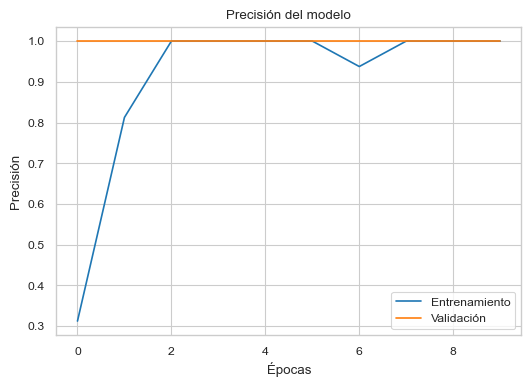

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
              precision    recall  f1-score   support

      NORMAL       1.00      1.00      1.00         2
     ENFERMO       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



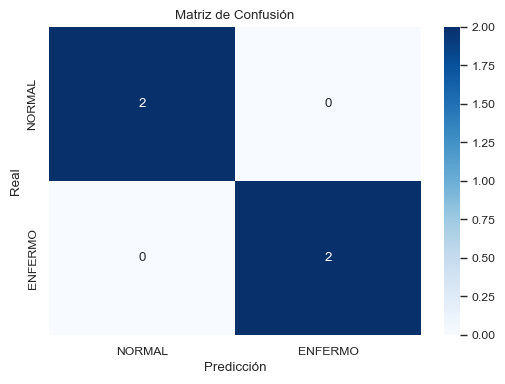

In [70]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Precisión del modelo")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

# Métricas
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=categories))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


### **Reflexión ética y análisis crítico**

El uso de IA en salud, como en el caso de DeepMind y Moorfields, plantea preguntas clave:

- **Privacidad del paciente**: ¿Cómo se garantiza el anonimato en los datos médicos?
- **Transparencia del modelo**: ¿Puede el médico entender y confiar en la decisión del algoritmo?
- **Equidad algorítmica**: ¿El modelo funciona igual de bien en diferentes grupos demográficos?

##  **3. ⚖️ Caso de Estudio: Corte Suprema de Colombia**

La Corte Suprema de Justicia de Colombia constituye el máximo tribunal de la jurisdicción ordinaria y desempeña un papel esencial en la interpretación y unificación de la jurisprudencia, así como en la protección de los derechos fundamentales a través de sus decisiones. Su estructura y funcionamiento se enmarcan en la Constitución Política de 1991 y en normas procesales que garantizan la independencia judicial y el debido proceso. 

Analizar casos emblemáticos resueltos por este tribunal permite comprender la interacción entre la ley, la jurisprudencia y el contexto sociopolítico, aportando insumos valiosos para estudios en ciencia de datos aplicados al análisis legal ([Ariza & Velásquez, 2019](https://books.google.com/books?hl=es&lr=&id=GMWAEAAAQBAJ&oi=fnd&pg=PT24&dq=Ariza,+A.,+%26+Vel%C3%A1squez,+C.+(2019).+La+Corte+Suprema+de+Justicia+de+Colombia+y+su+papel+en+el+Estado+de+Derecho.+Revista+Derecho+y+Sociedad,+52,+101%E2%80%93118.&ots=lxWXA9_Bas&sig=vqD0xlHwvJuyXyEIwMi4MXe7wzI); [Uprimny, 2011](https://www.uexternado.edu.co/facecono/ecoinstitucional/workingpapers/ruprimny5.pdf)).

### **Importar de librerías**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bernarda.salazar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Datos simulados**

In [72]:
# Simulación: cada sentencia tiene texto completo, fecha, sala y tema
datos_simulados = [
    {
        "fecha": "2023-05-12",
        "sala": "Laboral",
        "tema": "Accidente laboral",
        "texto": "La Corte establece que el empleador debe garantizar condiciones de seguridad adecuadas."
    },
    {
        "fecha": "2022-11-03",
        "sala": "Penal",
        "tema": "Homicidio culposo",
        "texto": "Se analiza la responsabilidad penal por imprudencia en conducción vehicular."
    },
    {
        "fecha": "2021-08-19",
        "sala": "Civil",
        "tema": "Contrato de compraventa",
        "texto": "La sentencia aclara la nulidad por vicios del consentimiento en contratos civiles."
    },
    {
        "fecha": "2020-03-15",
        "sala": "Constitucional",
        "tema": "Derecho a la salud",
        "texto": "Se reconoce el derecho a la salud como fundamental y exigible judicialmente."
    },
    {
        "fecha": "2023-01-10",
        "sala": "Laboral",
        "tema": "Despido injustificado",
        "texto": "La Corte determina que el despido sin justa causa vulnera el mínimo vital del trabajador."
    }
]

# Crear DataFrame
data = pd.DataFrame(datos_simulados)

# Mostrar las primeras filas
data.head()


,fecha,sala,tema,texto
0,2023-05-12,Laboral,Accidente laboral,La Corte establece que el empleador debe garan...
1,2022-11-03,Penal,Homicidio culposo,Se analiza la responsabilidad penal por imprud...
2,2021-08-19,Civil,Contrato de compraventa,La sentencia aclara la nulidad por vicios del ...
3,2020-03-15,Constitucional,Derecho a la salud,Se reconoce el derecho a la salud como fundame...
4,2023-01-10,Laboral,Despido injustificado,La Corte determina que el despido sin justa ca...


### **Preprocesamiento del texto jurídico**

In [73]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = ' '.join([word for word in texto.split() if word not in spanish_stopwords])
    return texto

data["texto_limpio"] = data["texto"].apply(limpiar_texto)


### **Visualización de temas frecuentes**

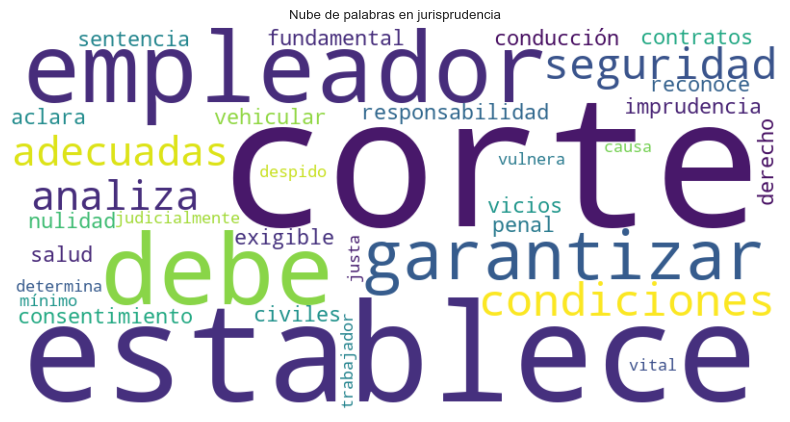

In [74]:
texto_total = ' '.join(data["texto_limpio"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras en jurisprudencia")
plt.show()


### **Vectorización y reducción de dimensionalidad**



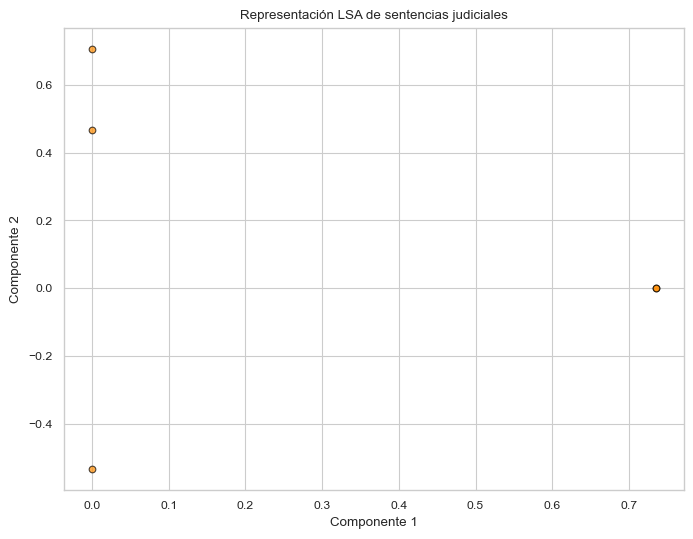

In [75]:
# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data["texto_limpio"])

# Ajuste automático del número de componentes
n_features = X.shape[1]
n_components = min(100, n_features)  # Evita el error si hay pocas columnas

# Reducción con LSA (Truncated SVD)
lsa = TruncatedSVD(n_components=n_components, random_state=42)
X_lsa = lsa.fit_transform(X)

# Visualización en 2D (usando las dos primeras componentes)
plt.figure(figsize=(8, 6))
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], alpha=0.7, color='darkorange', edgecolors='k')
plt.title("Representación LSA de sentencias judiciales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

### **Búsqueda de precedentes similares**

In [76]:
def buscar_precedentes(texto_consulta, top_n=5):
    texto_limpio = limpiar_texto(texto_consulta)
    vec = vectorizer.transform([texto_limpio])
    vec_lsa = lsa.transform(vec)
    similitudes = cosine_similarity(vec_lsa, X_lsa)[0]
    indices = np.argsort(similitudes)[::-1][:top_n]
    return data.iloc[indices][["fecha", "sala", "tema", "texto"]]

# Ejemplo de consulta
consulta = "responsabilidad del empleador por accidente laboral"
resultados = buscar_precedentes(consulta)
resultados


,fecha,sala,tema,texto
1,2022-11-03,Penal,Homicidio culposo,Se analiza la responsabilidad penal por imprud...
0,2023-05-12,Laboral,Accidente laboral,La Corte establece que el empleador debe garan...
3,2020-03-15,Constitucional,Derecho a la salud,Se reconoce el derecho a la salud como fundame...
2,2021-08-19,Civil,Contrato de compraventa,La sentencia aclara la nulidad por vicios del ...
4,2023-01-10,Laboral,Despido injustificado,La Corte determina que el despido sin justa ca...


### **Reflexión ética y jurídica**
El uso de IA en el análisis jurisprudencial plantea desafíos clave:

- **Transparencia algorítmica**: ¿Cómo se garantiza que el sistema no excluya precedentes relevantes?
- **Sesgo en el corpus**: ¿Qué ocurre si el modelo aprende patrones discriminatorios por sesgos históricos?
- **Acceso equitativo**: ¿Está esta tecnología disponible para defensores públicos y ciudadanos?

## **4. 🚗 Caso de Estudio: Tesla Autopilot**

### **Importar de librerías**

In [77]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

### **Simulación de datos de sensores**

In [78]:
# Datos simulados: velocidad, distancia a obstáculos, posición GPS, estado del carril

def generar_datos_sensores(n=100):
    datos = []
    for i in range(n):
        velocidad = random.uniform(20, 120)  # km/h
        distancia_obstaculo = random.uniform(0, 100)  # metros
        desviacion_carril = random.uniform(-1.5, 1.5)  # metros
        gps_lat = 6.251 + random.uniform(-0.001, 0.001)
        gps_lon = -75.563 + random.uniform(-0.001, 0.001)
        datos.append([velocidad, distancia_obstaculo, desviacion_carril, gps_lat, gps_lon])
    return pd.DataFrame(datos, columns=["velocidad", "distancia_obstaculo", "desviacion_carril", "gps_lat", "gps_lon"])

df = generar_datos_sensores()
df.head()


,velocidad,distancia_obstaculo,desviacion_carril,gps_lat,gps_lon
0,21.364336,47.658230,-0.445956,6.250102,-75.563837
1,90.008982,94.841018,0.561227,6.250495,-75.563583
2,95.319132,66.267284,1.240182,6.251198,-75.563614
3,77.075496,80.357529,-0.775157,6.250046,-75.563927
4,119.471824,27.384931,0.068292,6.250395,-75.562492


### **Visualización de trayectorias GPS**

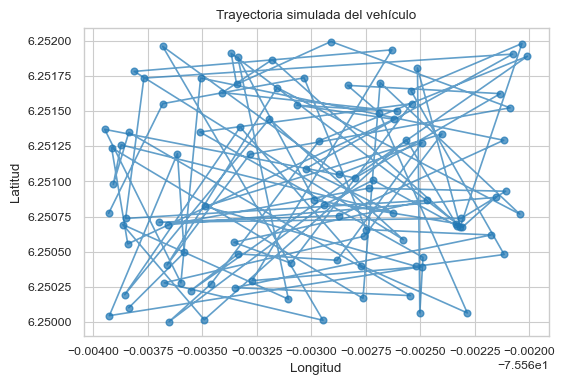

In [79]:
plt.plot(df["gps_lon"], df["gps_lat"], marker='o', linestyle='-', alpha=0.7)
plt.title("Trayectoria simulada del vehículo")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


### **Detección de riesgo en tiempo real**

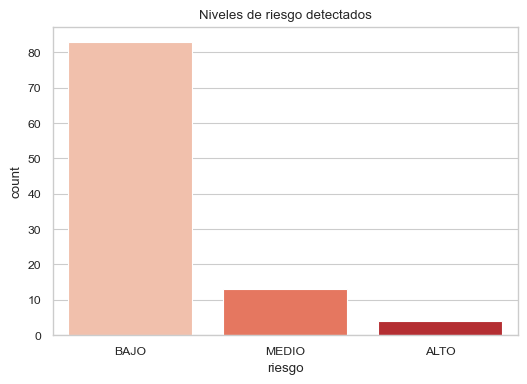

In [80]:
def evaluar_riesgo(fila):
    if fila["distancia_obstaculo"] < 10 and fila["velocidad"] > 80:
        return "ALTO"
    elif fila["distancia_obstaculo"] < 25:
        return "MEDIO"
    else:
        return "BAJO"

df["riesgo"] = df.apply(evaluar_riesgo, axis=1)

# Visualización del riesgo
sns.countplot(x="riesgo", data=df, palette="Reds")
plt.title("Niveles de riesgo detectados")
plt.show()


### **Toma de decisiones automatizada**

In [81]:

def decision_autopilot(fila):
    if fila["riesgo"] == "ALTO":
        return "Frenar"
    elif fila["riesgo"] == "MEDIO":
        return "Reducir velocidad"
    elif abs(fila["desviacion_carril"]) > 1.0:
        return "Corregir dirección"
    else:
        return "Mantener velocidad"

df["accion"] = df.apply(decision_autopilot, axis=1)
df[["velocidad", "distancia_obstaculo", "desviacion_carril", "riesgo", "accion"]].head(10)


,velocidad,distancia_obstaculo,desviacion_carril,riesgo,accion
0,21.364336,47.658230,-0.445956,BAJO,Mantener velocidad
1,90.008982,94.841018,0.561227,BAJO,Mantener velocidad
2,95.319132,66.267284,1.240182,BAJO,Corregir dirección
3,77.075496,80.357529,-0.775157,BAJO,Mantener velocidad
4,119.471824,27.384931,0.068292,BAJO,Mantener velocidad
5,94.545013,74.324247,0.647547,BAJO,Mantener velocidad
6,74.936618,48.822610,-0.250370,BAJO,Mantener velocidad
7,55.012480,22.182395,-1.282779,MEDIO,Reducir velocidad
8,25.579096,24.378726,-0.593708,MEDIO,Reducir velocidad
9,66.522797,61.601630,0.697260,BAJO,Mantener velocidad


### **Reflexión ética y técnica**

Los sistemas como Tesla Autopilot enfrentan desafíos complejos:

- **Responsabilidad legal**: ¿Quién responde ante un accidente causado por una decisión algorítmica?
- **Fiabilidad del sensor**: ¿Qué ocurre si hay interferencias o fallos en la percepción?
- **Sesgo en el entrenamiento**: ¿El sistema responde igual en diferentes condiciones climáticas, culturales o geográficas?


## **5. Automatización de decisiones: riesgos y oportunidades**

La automatización de decisiones mediante sistemas de inteligencia artificial (IA) y aprendizaje automático ofrece ventajas significativas como la eficiencia, la reducción de errores humanos y la capacidad de procesar grandes volúmenes de información en tiempo real ([Brynjolfsson & McAfee, 2017](https://www.mintur.gob.es/Publicaciones/Publicacionesperiodicas/EconomiaIndustrial/RevistaEconomiaIndustrial/409/SEGUNDA%20CR%C3%8DTICA%20DE%20LIBROS.pdf)). No obstante, también conlleva riesgos importantes, entre ellos la opacidad algorítmica, la reproducción de sesgos en los datos de entrenamiento y la pérdida de autonomía humana en procesos críticos ([Rahwan et al., 2019](https://www.nature.com/articles/s41586-019-1138-y)). 

> En el contexto judicial y administrativo, la automatización debe incorporar mecanismos de auditoría, explicabilidad y supervisión humana, garantizando el respeto por los derechos fundamentales y la transparencia de los procesos ([European Commission, 2021](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:52021PC0206)).

> Estudios recientes muestran que el 42% de las tareas laborales estarán automatizadas para 2027, afectando especialmente a sectores vulnerables ([González & Ramírez, 2023](https://tecnologias.usach.cl/wp-content/uploads/2024/10/extra_-articulo-aceptado-2023_02-IA-en-la-toma-de-decisiones.pdf); [Martínez & Torres, 2024](https://repositorio.unbosque.edu.co/bitstreams/f2656ed2-0471-4cf4-9dba-3d7555bd46e5/download); [Pérez & Salazar, 2025](https://ve.scielo.org/scielo.php?script=sci_arttext&pid=S2739-00632025000402021)).


### ⚠️ **Riesgos clave**

| Riesgo                      | Ejemplo concreto                                                                 |
|----------------------------|----------------------------------------------------------------------------------|
| Opacidad algorítmica       | Un sistema de evaluación crediticia que niega préstamos sin explicar por qué.   |
| Reproducción de sesgos     | Algoritmos judiciales que recomiendan sentencias más severas para minorías.     |
| Pérdida de autonomía humana| Diagnósticos médicos automatizados sin posibilidad de apelación humana.         |


### **Preguntas**

- ¿Qué tipo de decisiones **no deberían** ser automatizadas bajo ningún contexto?  
- ¿Cómo podemos diseñar sistemas que **aprendan sin perpetuar injusticias** históricas?  
- ¿Qué rol deben tener los ciudadanos en la **gobernanza algorítmica**?

##  **6. Tendencias emergentes en ciencia de datos para decisiones**
La ciencia de datos aplicada a la toma de decisiones está evolucionando hacia enfoques más interpretables, éticos y colaborativos, impulsados por la necesidad de confianza pública en los resultados de los modelos ([Doshi-Velez & Kim, 2017](https://arxiv.org/abs/1702.08608)). Entre las tendencias emergentes destacan: 
> - Explainable AI (XAI), que busca hacer comprensibles las decisiones algorítmicas; 
> - IA responsable, que integra principios éticos desde el diseño
> - Modelos híbridos que combinan técnicas estadísticas clásicas con redes neuronales para mejorar la precisión y la interpretabilidad ([Miller, 2019](https://www.sciencedirect.com/science/article/pii/S0004370218305988?via%3Dihub)). 
> - Uso de datos abiertos y analítica en tiempo real para la toma de decisiones en políticas públicas y justicia ([OECD, 2021](https://www.oecd.org/en/publications/artificial-intelligence-in-society_eedfee77-en.html)).

### **6.1. Inteligencia Artificial Generativa (IAG)**
La IAG permite crear contenido nuevo (texto, imágenes, código, audio) a partir de datos previos, optimizando procesos creativos y de análisis.

> **Ejemplo:** [ChatGPT](https://openai.com/research) se utiliza para generar resúmenes de reportes financieros, reduciendo tiempos de análisis y mejorando la velocidad de respuesta en entornos corporativos.


### **6.2. Aprendizaje automático explicable (Explainable AI, XAI)**
El XAI busca que los modelos sean interpretables para humanos, permitiendo comprender el "por qué" detrás de las predicciones.

> **Ejemplo:** En diagnóstico médico, modelos XAI permiten a los doctores visualizar qué variables influyeron en el diagnóstico de neumonía a partir de radiografías ([Samek et al., 2021](https://arxiv.org/abs/2003.07631)).


### **6.3. Edge Computing para analítica en tiempo real**
El procesamiento en el borde permite analizar datos localmente, reduciendo latencias y dependencia de la nube.

> **Ejemplo:** Sensores en plantas industriales procesan datos de vibración de maquinaria en tiempo real para predecir fallas antes de que ocurran ([Shi et al., 2016](https://ieeexplore.ieee.org/document/7488250)).


### **6.4. Integración de datos no estructurados**
El análisis de datos como texto libre, imágenes o audio está ganando protagonismo gracias a avances en NLP y visión por computadora.

> **Ejemplo:** Plataformas de servicio al cliente utilizan análisis de sentimientos en llamadas y chats para identificar patrones de insatisfacción ([Cambria et al., 2022](https://www.computer.org/csdl/journal/ta/2024/03/10185138/1ORkhM4yBoI)).


### **6.5. Automatización de la ciencia de datos (AutoML)**
El AutoML facilita la creación de modelos sin intervención manual intensiva, democratizando el acceso a la inteligencia artificial.

> **Ejemplo:** Google AutoML permite a pequeñas empresas desarrollar modelos predictivos para optimizar inventarios sin contar con un equipo experto ([Zöller & Huber, 2021](https://www.sciencedirect.com/science/article/pii/S0004370221000060?via%3Dihub)).

